# Exponential Moving Average

In [72]:
import pandas as pd

df = pd.read_csv('./data/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv', parse_dates=["Date"])
print(df)

                RowId       Date  SecuritiesCode    Open    High     Low  \
0       20211206_1301 2021-12-06            1301  2982.0  2982.0  2965.0   
1       20211206_1332 2021-12-06            1332   592.0   599.0   588.0   
2       20211206_1333 2021-12-06            1333  2368.0  2388.0  2360.0   
3       20211206_1375 2021-12-06            1375  1230.0  1239.0  1224.0   
4       20211206_1376 2021-12-06            1376  1339.0  1372.0  1339.0   
...               ...        ...             ...     ...     ...     ...   
111995  20220228_9990 2022-02-28            9990   511.0   518.0   509.0   
111996  20220228_9991 2022-02-28            9991   823.0   825.0   814.0   
111997  20220228_9993 2022-02-28            9993  1600.0  1622.0  1600.0   
111998  20220228_9994 2022-02-28            9994  2568.0  2568.0  2540.0   
111999  20220228_9997 2022-02-28            9997   731.0   737.0   726.0   

         Close   Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  \
0      

In [73]:
df['Price'] = (df['High']+df['Low'])/2
print(df)

                RowId       Date  SecuritiesCode    Open    High     Low  \
0       20211206_1301 2021-12-06            1301  2982.0  2982.0  2965.0   
1       20211206_1332 2021-12-06            1332   592.0   599.0   588.0   
2       20211206_1333 2021-12-06            1333  2368.0  2388.0  2360.0   
3       20211206_1375 2021-12-06            1375  1230.0  1239.0  1224.0   
4       20211206_1376 2021-12-06            1376  1339.0  1372.0  1339.0   
...               ...        ...             ...     ...     ...     ...   
111995  20220228_9990 2022-02-28            9990   511.0   518.0   509.0   
111996  20220228_9991 2022-02-28            9991   823.0   825.0   814.0   
111997  20220228_9993 2022-02-28            9993  1600.0  1622.0  1600.0   
111998  20220228_9994 2022-02-28            9994  2568.0  2568.0  2540.0   
111999  20220228_9997 2022-02-28            9997   731.0   737.0   726.0   

         Close   Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  \
0      

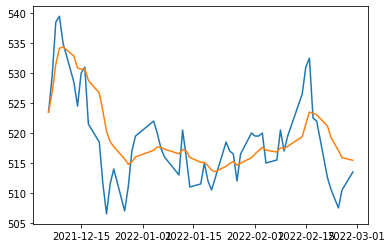

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df[df['SecuritiesCode']==9990]['Date'], df[df['SecuritiesCode']==9990]['Price'])
span=10
plt.plot(df[df['SecuritiesCode']==9990]['Date'], df[df['SecuritiesCode']==9990]['Price'].ewm(span=span).mean())

In [75]:
means = df.groupby(['SecuritiesCode']).transform('mean')
df['NormalizedPrice'] = (df['Price']-means['Price'])

/tmp/ipykernel_24658/3643651620.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  means = df.groupby(['SecuritiesCode']).transform('mean')


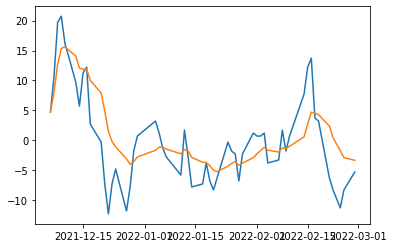

In [76]:
df['EMA'] = df.groupby(['SecuritiesCode'])['NormalizedPrice'].ewm(span=span).mean().droplevel(level=0)
plt.plot(df[df['SecuritiesCode']==9990]['Date'], df[df['SecuritiesCode']==9990]['NormalizedPrice'])
plt.plot(df[df['SecuritiesCode']==9990]['Date'], df[df['SecuritiesCode']==9990]['EMA'])

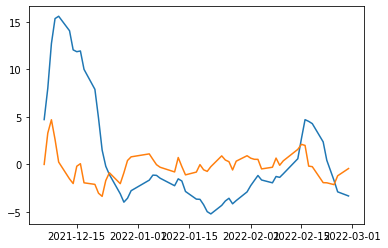

In [77]:
df['EMAdiff'] = df.groupby(['SecuritiesCode'])['EMA'].diff().fillna(0)
plt.plot(df[df['SecuritiesCode']==9990]['Date'], df[df['SecuritiesCode']==9990]['EMA'])
plt.plot(df[df['SecuritiesCode']==9990]['Date'], df[df['SecuritiesCode']==9990]['EMAdiff'])

In [78]:
# Rank based on EMAdiff
df['Rank'] = df.groupby("Date")["EMAdiff"].rank(ascending=False, method="first") - 1
df['Rank'] = df['Rank'].astype('int')
df.tail()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Price,NormalizedPrice,EMA,EMAdiff,Rank
111995,20220228_9990,2022-02-28,9990,511.0,518.0,509.0,516.0,120600,1.0,NaN,False,-0.013592,513.5,-5.276786,-3.323915,-0.433978,1023
111996,20220228_9991,2022-02-28,9991,823.0,825.0,814.0,822.0,16200,1.0,NaN,False,-0.020581,819.5,12.339286,13.078962,-0.164375,973
111997,20220228_9993,2022-02-28,9993,1600.0,1622.0,1600.0,1600.0,4000,1.0,NaN,False,0.005762,1611.0,-12.125,13.571848,-5.710503,1566
111998,20220228_9994,2022-02-28,9994,2568.0,2568.0,2540.0,2565.0,9000,1.0,NaN,False,-0.002341,2554.0,97.205357,75.090501,4.914492,408
111999,20220228_9997,2022-02-28,9997,731.0,737.0,726.0,734.0,288100,1.0,NaN,False,-0.030014,731.5,11.669643,11.161050,0.113022,920


In [79]:
df_submission = df.sort_values(["Date", "Rank"],ascending=True)
df_submission.tail()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Price,NormalizedPrice,EMA,EMAdiff,Rank
111250,20220228_6954,2022-02-28,6954,20965.0,21155.0,20715.0,21155.0,836700,1.0,NaN,False,-0.036415,20935.0,-2362.276786,-1718.524378,-143.058393,1995
110986,20220228_6146,2022-02-28,6146,31200.0,32400.0,31200.0,32150.0,225300,1.0,NaN,False,-0.027864,31800.0,-1628.125,-924.156826,-156.439890,1996
110809,20220228_4970,2022-02-28,4970,9460.0,9550.0,9160.0,9460.0,85900,1.0,NaN,False,-0.024974,9355.0,-4249.196429,-3477.564687,-171.476481,1997
111220,20220228_6861,2022-02-28,6861,54240.0,54380.0,53240.0,53780.0,742100,1.0,NaN,False,-0.020502,53810.0,-10703.928571,-9748.160505,-212.396323,1998
111991,20220228_9983,2022-02-28,9983,62070.0,62530.0,61050.0,61830.0,463500,1.0,NaN,False,-0.000632,61790.0,-3627.946429,-2389.577927,-275.197430,1999


In [80]:
import numpy as np
def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """

    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio

In [81]:
calc_spread_return_sharpe(df_submission)

0.12254441694222463